<a href="https://colab.research.google.com/github/villafue/Data-Science-at-Scale/blob/main/DataCamp/Big%20Data%20Fundamentals%20with%20PySpark/4%20Machine%20Learning%20with%20PySpark%20MLlib/4_Machine_Learning_with_PySpark_MLlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with PySpark MLlib

PySpark MLlib is the Apache Spark scalable machine learning library in Python consisting of common learning algorithms and utilities. Throughout this last chapter, you'll learn important Machine Learning algorithms. You will build a movie recommendation engine and a spam filter, and use k-means clustering.

# Overview of PySpark MLlib

1. Overview of PySpark MLlib

In the last chapter, you learned about PySpark SQL which is one of the high-level API built on top of Spark Core for structured data. In this chapter, you'll learn about PySpark MLlib which is a built-in library for scalable machine learning.
2. What is PySpark MLlib?

Before diving deep into PySpark MLlib, let's quickly define what machine learning is. According to Wikipedia, Machine learning is a scientific discipline that explores the construction and study of algorithms that can learn from data. PySpark MLlib is a machine-learning library. Its goal is to make practical machine learning scalable and easy. At a high level, PySpark MLlib provides tools such as: Machine learning algorithms which include collaborative filtering, classification, and clustering. Featurization which include feature extraction, transformation, dimensionality reduction, and selection. Pipelines which include constructing, evaluating, and tuning ML Pipelines. In this chapter, we will explore Machine Learning algorithms - collaborative filtering, classification, and clustering.
3. Why PySpark MLlib?

Many of you have heard about Scikit-learn, which is a very popular and easy to use Python library for machine learning. Then what is the need for PySpark MLlib? Scikit-learn algorithms work well for small to medium-sized datasets that can be processed on a single machine, but not for large datasets that require the power of parallel processing. On the other hand, PySpark MLlib only contains algorithms in which operations can be applied in parallel across nodes in a cluster. Unlike Scikit-learn, MLlib supports several other higher languages such as Scala, Java, and R in addition to Python. MLlib also provides a high-level API to build machine-learning pipelines. A machine learning pipeline is a complete workflow combining multiple machine learning algorithms together. PySpark is good
4. PySpark MLlib Algorithms

for iterative algorithms and using iterative algorithms, many machine-learning algorithms have been implemented in PySpark MLlib. PySpark MLlib currently supports various methods for binary classification, multiclass classification, and regression analysis. Some of the algorithms include linear SVMs, logistic regression, decision trees, random forests, gradient-boosted trees, naive Bayes, linear least squares, Lasso, ridge regression, isotonic regression. Collaborative filtering is commonly used for recommender systems and PySpark MLlib uses the alternating least squares (ALS) algorithm for collaborative filtering. Clustering algorithms consist of k-means, gaussian mixture, Power iteration clustering, Bisecting k-means and Streaming k-means. While PySpark MLlib includes several machine
5. The three C's of machine learning in PySpark MLlib

learning algorithms, we will specifically focus on the three key areas, often referred to as the three Cs of machine learning - Collaborative filtering, Classification, and Clustering. Collaborative filtering produces recommendations based on past behavior, preferences, or similarities to known entities/users. Classification is the problem of identifying to which of a set of categories a new observation belongs. Clustering is grouping of data into clusters based on similar characteristics. We'll go in more detail in the next few lessons. Now that you learned the 3 C's of the machine
6. PySpark MLlib imports

learning, let's quickly understand how we can import these PySpark MLlib libraries in the PySpark shell environment. Let's start with PySpark's collaborative filtering which is available in the pyspark-dot-mllib-dot-recommendation submodule. Here is how you import the ALS (Alternating Least Squares) class in PySpark shell. For binary classification, here is an example of how you import LogisticRegressionWithLBFGS class in the pyspark-dot-mllib-dot-classification submodule inside the PySpark shell. Similarly, for clustering, here is an example of importing the KMeans class in PySpark shell using the pyspark-dot-mllib-dot-clustering submodule. Let's practice
7. Let's practice

how well you understand the different Machine learning algorithms by importing them in PySpark shell. 



# PySpark MF libraries

What kind of data structures does pyspark.mllib built-in library support in Spark?

Possible Answers

1. DataFrames
 - Incorrect - psypark.ml and not pyspark.mllib is the built-in library for DataFrames.

2. RDDs
 - Correct!!! pyspark.mllib is the builtin library for RDD-based API.

3. Datasets
 - Incorrect - PySpark doesn't have Datasets.

4. All
 - Incorrect - pyspark.mllib can only support RDDs unless you change DataFrames to RDDs.

# PySpark MLlib algorithms

Before using any Machine learning algorithms in PySpark shell, you'll have to import the submodules of pyspark.mllib library and then choose the appropriate class that is needed for a specific machine learning task.

In this simple exercise, you'll learn how to import the different submodules of pyspark.mllib along with the classes that are needed for performing Collaborative filtering, Classification and Clustering algorithms.

Instructions

1. Import pyspark.mllib recommendation submodule and Alternating Least Squares class.

2. Import pyspark.mllib classification submodule and Logistic Regression with LBFGS class.

3. Import pyspark.mllib clustering submodule and kmeans class.


In [ ]:
# Import the library for ALS
from pyspark.mllib.recommendation import ALS

# Import the library for Logistic Regression
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Import the library for Kmeans
from pyspark.mllib.clustering import KMeans

Conclusion

Sweet. You don't have to import these submodules and classes for the rest of the chapter as they will be imported to you in the environment.

# Collaborative filtering

1. Introduction to Collaborative filtering

In the previous video, you have been introduced with the three C'S of machine learning. In this video, we will start with the 1st C which is Collaborative filtering, and gain a basic understanding of Recommender Systems in Spark. Let's get started.
2. What is Collaborative filtering?

Collaborative filtering is a method of making automatic predictions about the interests of a user by collecting preferences or taste information from many users. Collaborative filtering is one of the most commonly used algorithms in recommender systems. Collaborative filtering has two approaches: The User-User approach and Item-Item approach. The User-User approach finds users that are similar to the target user and uses their collaborative ratings to make recommendations for the target user. Item-Item approach finds and recommends items that are similar or related to items associated with the target user. Now let's take a look at different components that are needed to build a recommendation system in PySpark.
3. Rating class in pyspark.mllib.recommendation submodule

The Rating class in pyspark-dot-mllib-dot-recommendation submodule is a wrapper around tuple (user, product and rating). The Rating class is very useful for parsing the RDD and creating a tuple of user, product and rating. Here is a simple example of how you can create an instance of Rating class "r" with the values of user equals 1, product equals 2 and rating equals 5-point-0. Once the Rating class is created, you can extract the user, product and rating value using the index of "r" instance. In this example, r[0], r[1] and r[2] shows the userId, ProductID and rating for the "r" instance. Splitting the data
4. Splitting the data using randomSplit()

into training and testing sets is an integral part of machine learning. The training portion will be used to train the model, while the testing data is used to evaluate the model’s performance. Typically, a larger portion of the data is assigned for training and a smaller portion for testing. PySpark's randomSplit function can be used to randomly split the data with the provided weights and returns multiple RDDs. In this example, we first create an RDD which consists of numbers 1 to 10 and using randomSplit function we create two RDDs with 60:40 ratio. The output of the randomSplit function shows training RDDs contains 6 element whereas test RDD contains 4 elements.
5. Alternating Least Squares (ALS)

The alternating least squares (ALS) algorithm available in spark-dot-mllib helps to find products that the customers might like, based on their previous purchases or ratings. The ALS-dot-train method requires that we represent Rating objects as (UserId, ItemId, Rating) tuples along with training parameters rank and iterations. rank represents the number of features. Iterations represent the number of iterations to run the least squares computation. Here is an example of running the ALS model. First, we create an RDD from a list or Rating objects and print out the contents of the RDD using collect action. Next, we use ALS-dot-train to train the training data as shown in this example.
6. predictAll() – Returns RDD of Rating Objects

model, the next step is predicting the ratings for the user and product pairs. The predictAll method takes an RDD of user id and product id pair and returns a prediction for each pair. In order to get the example to work, let's create an RDD from a list of tuples containing userId and productId using Spark Context's parallelize method. Next, we apply the predictAll method on the unrated_RDD. Running collect Action on predictions shows a list of predicted ratings generated by ALS model for the userId 1 and productIds 1 and 2. For evaluating the model
7. Model evaluation using MSE

trained using ALS, we can use the Mean Squared Error (MSE). The MSE measures the average of the squares of the errors between what is estimated and the existing data. Continuing on our previous example, we'll first organize our ratings and prediction data to make (user, product) the rating. Next, we will join the ratings RDD with the prediction RDD and the result looks as follows. Finally, we apply a squared difference function to the map transformation of the rates_preds RDD and then use the mean to get the MSE. Now it's your turn
8. Let's practice!

to try your hand at collaborative filtering in PySpark 

# Loading Movie Lens dataset into RDDs

Collaborative filtering is a technique for recommender systems wherein users' ratings and interactions with various products are used to recommend new ones. With the advent of Machine Learning and parallelized processing of data, Recommender systems have become widely popular in recent years, and are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags. In this 3-part exercise, your goal is to develop a simple movie recommendation system using PySpark MLlib using a subset of [MovieLens 100k dataset](https://grouplens.org/datasets/movielens/100k/).

In the first part, you'll first load the MovieLens data (ratings.csv) into RDD and from each line in the RDD which is formatted as userId,movieId,rating,timestamp, you'll need to map the MovieLens data to a Ratings object (userID, productID, rating) after removing timestamp column and finally you'll split the RDD into training and test RDDs.

Remember, you have a SparkContext sc available in your workspace. Also file_path variable (which is the path to the ratings.csv file), and ALS class are already available in your workspace.

Instructions

1. Load the ratings.csv dataset into an RDD.

2. Split the RDD using , as a delimiter.

3. For each line of the RDD, using Rating() class create a tuple of userID, productID, rating.

4. Randomly split the data into training data and test data (0.8 and 0.2).


In [ ]:
# Load the data into RDD
data = sc.textFile(file_path)

# Split the RDD 
ratings = data.map(lambda l: l.split(','))

# Transform the ratings RDD 
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

Conclusion

Good job with preprocessing the data. It's time to train the ALS model!

# Model training and predictions

After splitting the data into training and test data, in the second part of the exercise, you'll train the ALS algorithm using the training data. PySpark MLlib's ALS algorithm has the following mandatory parameters - rank (the number of latent factors in the model) and iterations (number of iterations to run). After training the ALS model, you can use the model to predict the ratings from the test data. For this, you will provide the user and item columns from the test dataset and finally print the first 2 rows of predictAll() output.

Remember, you have SparkContext sc, training_data and test_data are already available in your workspace.

Instructions

1. Train ALS algorithm with training data and configured parameters (rank = 10 and iterations = 10).

2. Drop the rating column in the test data.

3. Test the model by predicting the rating from the test data.

4. Print the first two rows of the predicted ratings.


In [ ]:
# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)

# Drop the ratings column 
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model  
predictions = model.predictAll(testdata_no_rating)

# Print the first rows of the RDD
predictions.take(2)

Conclusion

Model training and predictions are neatly done. Let's find out how successful your model is in the next part.

# Model evaluation using MSE

After generating the predicted ratings from the test data using ALS model, in this final part of the exercise, you'll prepare the data for calculating Mean Square Error (MSE) of the model. The MSE is the average value of (original rating – predicted rating)^2 for all users and indicates the absolute fit of the model to the data. To do this, first, you'll organize both the ratings and prediction RDDs to make a tuple of ((user, product), rating)), then join the ratings RDD with prediction RDD and finally apply a squared difference function along with mean() to get the MSE.

Remember, you have a SparkContext sc available in your workspace. Also, ratings_final and predictions RDD are already available in your workspace.

Instructions

1. Organize ratings RDD to make ((user, product), rating).

2. Organize predictions RDD to make ((user, product), rating).

3. Join the prediction RDD with the ratings RDD.

4. Evaluate the model using MSE between original rating and predicted rating and print it.


In [ ]:
# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

'''
<script.py> output:
    Mean Squared Error of the model for the test data = 1.37
'''

Conclusion

Hurray! You have successfully created a Movie Recommendation System using Apache Spark.

# Classification

1. Classification

In the previous video, you learned about Collaborative filtering which is the 1st C of Machine learning algorithms in PySpark MLlib. In this video, you'll learn about the 2nd C of Machine Learning which is Classification.
2. Classification using PySpark MLlib

Classification is a popular machine learning algorithm that identifies which category an item belongs to. For example, whether an email is spam or non-spam, based on labeled examples of other items. Classification takes a set of data with known labels and pre-determined features and learns how to label new records based on that information. That is why Classification comes under a supervised learning technique. Classifications can be divided into two different types - Binary Classification and Multiclass Classification. In Binary classification, we want to classify entities into two distinct categories. For example, determining whether a cancer type is malignant or not. PySpark MLlib supports various methods for binary classification such as linear SVMs, logistic regression, decision trees, random forests, gradient-boosted trees, naive Bayes. In multiclass classification, we want to classify entities into more than two categories. For example, determining what category a news article belong to. PySpark MLlib supports various methods for multiclass classification such as logistic regression, decision trees, random forests, naive Bayes. Let's focus on Logistic regression which is the
3. Introduction to Logistic Regression

most popular supervised machine learning method. Logistic regression is a classification method to predict a binary response given some independent variable. It measures the relationship between the “Label” on the Y-axis and "Features" on the X-axis using a logistic function as shown in this figure. In logistic regression, the output must be 0 or 1. The convention is if the probability is greater than 50% then the logistic regression output is 1 otherwise, it is 0. PySpark MLlib contains a few specific data types such
4. Working with Vectors

as Vectors and LabelledPoint. Let's understand each of these data types. Vectors in PySpark MLlib comes in two flavors: dense and sparse. Dense vectors store all their entries in an array of floating point numbers. For examples, a vector of 100 will contain 100 double values. In contrast, sparse vectors store only the nonzero values and their indices. Here is an example of creating a dense vector of 1-point-0, 2-point-0, 3-point-0 using Vectors dense method. And here is an example of creating a sparse vector with size of the vector equal to 4 and Non-zero entries 1: 1-point-0, 3: 5-point-5, as a dictionary using Vectors sparse method.
5. LabelledPoint() in PySpark MLlib

A Labeledpoint is a wrapper around the input features and predicted value. LabeledPoint includes a label and a feature vector. The label is a floating-point value and in the case of binary classification, it is either 1 (positive) or 0 (negative). This example shows a positive LabeledPoint with label “1” and a feature vector (1-point-0, 0-point-0, 3-point-0) and negative LabeledPoint with label “0” and a feature vector (2-point-0, 1-point-0, 1-point-0). PySpark MLlib has an
6. HashingTF() in PySpark MLlib

algorithm called HashingTF that computes a term frequency vector of a given size from a document. Let's illustrate this with an example. In this simple example, first, we will split the sentence "hello hello world" into a list of words using the split method and we will create vectors of size 10000. Finally we compute the term frequency vector by using tf's transform method on the words. As you can see the sentence is turned into a sparse vector holding feature number and occurrences of each word. Among several algorithms, the
7. Logistic Regression using LogisticRegressionWithLBFGS

popular algorithm available for Logistic Regression in PySpark MLlib is LBFGS. The minimum requirement for LogisticRegressionWithLBFGS is an RDD of LabeledPoint. To understand how LogisticRegressionworks, let's see a simple example. We first create a list of LabelPoints with labels 0 and 1 and then using SparkContext's parallelize method we will create an RDD. Then we will use LogisticRegressionWithLBFGS-dot-train method to train a logistic regression model on the RDD. Once the model is trained from LogisticRegressionWithLBFGS algorithm, the predict method computes a score between 0 and 1 for each point as shown here. Now it's your turn to
8. Final Slide

practice Classification using PySpark MLlib! 

# Loading spam and non-spam data

Logistic Regression is a popular method to predict a categorical response. Probably one of the most common applications of the logistic regression is the message or email spam classification. In this 3-part exercise, you'll create an email spam classifier with logistic regression using Spark MLlib. Here are the brief steps for creating a spam classifier.

    * Create an RDD of strings representing email.
    * Run MLlib’s feature extraction algorithms to convert text into an RDD of vectors.
    * Call a classification algorithm on the RDD of vectors to return a model object to classify new points.
    * Evaluate the model on a test dataset using one of MLlib’s evaluation functions.

In the first part of the exercise, you'll load the 'spam' and 'ham' (non-spam) files into RDDs, split the emails into individual words and look at the first element in each of the RDD.

Remember, you have a SparkContext sc available in your workspace. Also file_path_spam variable (which is the path to the 'spam' file) and file_path_non_spam (which is the path to the 'non-spam' file) is already available in your workspace.

Instructions

1. Create two RDDS, one for 'spam' and one for 'non-spam (ham)'.

2. Split each email in 'spam' and 'non-spam' RDDs into words.

3. Print the first element in the split RDD of both 'spam' and 'non-spam'.


In [ ]:
# Load the datasets into RDDs
spam_rdd = sc.textFile(file_path_spam)
non_spam_rdd = sc.textFile(file_path_non_spam)

# Split the email messages into words
spam_words = spam_rdd.flatMap(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())

'''
<script.py> output:
    The first element in spam_words is You
    The first element in non_spam_words is Rofl.
'''

Conclusion

Good job! The words in spam and non-spam RDDs may look familiar to you from your emails.

# Feature hashing and LabelPoint

After splitting the emails into words, our raw data set of 'spam' and 'non-spam' is currently composed of 1-line messages consisting of spam and non-spam messages. In order to classify these messages, we need to convert text into features.

In the second part of the exercise, you'll first create a HashingTF() instance to map text to vectors of 200 features, then for each message in 'spam' and 'non-spam' files you'll split them into words, and each word is mapped to one feature. These are the features that will be used to decide whether a message is 'spam' or 'non-spam'. Next, you'll create labels for features. For a valid message, the label will be 0 (i.e. the message is not spam) and for a 'spam' message, the label will be 1 (i.e. the message is spam). Finally, you'll combine both the labeled datasets.

Remember, you have a SparkContext sc available in your workspace. Also spam_words and non_spam_words variables are already available in your workspace.

Instructions

1. Create a HashingTF() instance to map email text to vectors of 200 features.

2. Each message in 'spam' and 'non-spam' datasets are split into words, and each word is mapped to one feature.

3. Label the features: 1 for spam, 0 for non-spam.

4. Combine both the spam and non-spam samples into a single dataset.


In [ ]:
# Create a HashingTf instance with 200 features
tf = HashingTF(numFeatures=200)

# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features))

# Combine the two datasets
samples = spam_samples.join(non_spam_samples)

Conclusion

Feature hashing and LabeledPoints are quite powerful for text based classification in PySpark MLlib!

Logistic Regression model training

After creating labels and features for the data, we’re ready to build a model that can learn from it (training). But before you train the model, you'll split the combined dataset into training and testing dataset because it can assign a probability of being spam to each data point. We can then decide to classify messages as spam or not, depending on how high the probability.

In this final part of the exercise, you'll split the data into training and test, run Logistic Regression on the training data, apply the same HashingTF() feature transformation to get vectors on a positive example (spam) and a negative one (non-spam) and finally check the accuracy of the model trained.

Remember, you have a SparkContext sc available in your workspace, as well as the samples variable.

Instructions

1. Split the combined data into training and test sets (80/20).

2. Train the Logistic Regression (LBFGS variant) model with the training dataset.

3. Create a prediction label from the trained model on the test dataset.

4. Combine the labels in the test dataset with the labels in the prediction dataset.
    
5. Calculate the accuracy of the trained model using original and predicted labels on the labels_and_preds.


In [ ]:
# Split the data into training and testing
train_samples,test_samples = samples.randomSplit([0.8, 0.2])

# Train the model
model = LogisticRegressionWithLBFGS.train(train_samples)

# Create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features))

# Combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)

# Check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[0]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))

'''
<script.py> output:
    Model accuracy : 1.00
'''

Conclusion

Congratulations! You sucessfully created a spam classifier in just a few steps. Your classifier predicted about 80% of the labels correctly. Can you think of a way to improve this accuracy?

# Clustering

1. Introduction to Clustering

In the previous video, you learned about Classification, a type of supervised learning method. But what if we want to make sense of unlabeled data? In this video, you'll learn about Clustering which is a type of unsupervised learning method to group unlabeled data together.
2. What is Clustering?

So what exactly is Clustering? Clustering is the unsupervised learning task that involves grouping objects into clusters of high similarity with no labels. Unlike the supervised learning methods that you have seen before such as Collaborative filtering and Classification, where data is labeled, Clustering can be used to make sense of unlabeled data. PySpark MLlib library offers a handful of clustering models such as K-means clustering, Gaussian mixture clustering, Power iteration clustering (PIC), Bisecting k-means clustering and Streaming k-means clustering. In this video, we will focus on K-means clustering because of its simplicity and popularity.
3. K-means Clustering

K-means is an unsupervised method that takes data points in an input data and will identify which data points belong to each one of the clusters. As shown in the left side of the figure, we provide 'n' data points and a predefined number of 'k' clusters. The K-means algorithm through a series of iterations creates clusters as shown on the right side of the figure. The K-means clustering minimally requires that the data is a set of numerical features and that we specify the target number of 'K' clusters ahead. The first step in implementing the
4. K-means with Spark MLLib

K-means clustering algorithm using PySpark MLlib is loading the numerical data into an RDD, and then parsing the data based on a delimiter. Here is an example of how you load a CSV file into an RDD using SparkContext's textFile method, then parsing the RDD based on comma delimiter and finally converting the floats to integers. The contents of the first five lines of RDD can be printed using take(5). As you can see, the dataset contains 2 columns, each column indicating a feature loaded into an RDD. Like other algorithms, you invoke K-means by calling KMeans-dot-train method
5. Train a K-means clustering model

which takes an RDD, the number of clusters we expect and the maximum number of iterations allowed. Continuing our previous example, first, we can import the KMeans class from pyspark-dot-mllib-dot-clustering submodule. Next, we call KMeans-dot-train method on RDD and the two parameters k equals 2, and maxIterations equals 10. KMeans-dot-train returns a KMeansModel that lets you access the cluster centers using the model-dot-clusterCenters attribute. An example of cluster centers for k equals 2 is shown here. The next step in K-means clustering is to
6. Evaluating the K-means Model

evaluate the model by computing the error function. Unfortunately, PySpark K-means algorithm doesn't have a method already, so we have to write a function by ourselves as shown here. We will next apply the error function on the RDD and calculate Within Set Sum of Squared Error. Continuing our previous example, we apply map transformation of error function to our input RDD to calculate Within Set Sum of Squared Error which is 77-point-96 in this example. An optional but highly
7. Visualizing K-means clusters

recommended step in K-means clustering is cluster visualization. Continuing from our previous example, let's first create a scatter plot of the two feature columns in the sample data. Next, overlay it with the cluster centers from the KMeans model which are indicated by colored "x"'s in this figure. The purple and yellow colors here represent the labels created from the model based on the K which is 2 in this example. As you can see, the overlaid scatter plot shows a reasonable clustering with the 2 centroids placed in the center of the each of the cluster. Now let's quickly
8. Visualizing clusters

take a look at the code to generate the previous plot. As seen previously, plotting libraries doesn't work directly on RDDs and DataFrames. As shown here, we first convert RDD to Spark DataFrame and then to Pandas DataFrame. We also convert cluster centers from KMeans model into a Pandas DataFrame. Finally, we use plt function in matplotlib library to create a overlaid scatter plot as shown in the previous slide. Let's use a real world
9. Clustering practice

data and generate some nice clusters using PySpark's MLlib KMeans clustering algorithm. 

# Loading and parsing the 5000 points data

Clustering is the unsupervised learning task that involves grouping objects into clusters of high similarity. Unlike the supervised tasks, where data is labeled, clustering can be used to make sense of unlabeled data. PySpark MLlib includes the popular K-means algorithm for clustering. In this 3 part exercise, you'll find out how many clusters are there in a dataset containing 5000 rows and 2 columns. For this you'll first load the data into an RDD, parse the RDD based on the delimiter, run the KMeans model, evaluate the model and finally visualize the clusters.

In the first part, you'll load the data into RDD, parse the RDD based on the delimiter and convert the string type of the data to an integer.

Remember, you have a SparkContext sc available in your workspace. Also file_path variable (which is the path to the 5000_points.txt file) is already available in your workspace.

Instructions

1. Load the 5000_points dataset into a RDD named clusterRDD.

2. Transform the clusterRDD by splitting the lines based on the tab ("\t").

3. Transform the split RDD to create a list of integers for the two columns.

4. Confirm that there are 5000 rows in the dataset.


In [ ]:
# Load the dataset into a RDD
clusterRDD = sc.textFile(file_path)

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split("\t"))

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

'''
<script.py> output:
    There are 5000 rows in the rdd_split_int dataset
'''

Conclusion

Good start! You have succesfully loaded the data into RDD for kmeans clustering.

# K-means training

Now that the RDD is ready for training, in the second part of the exercise, you'll train the RDD with PySpark's MLlib's KMeans algorithm. The algorithm is somewhat naive--it clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, the most important parameter is a target number of clusters to generate, k. In practice, you rarely know the “true” number of clusters in advance, so the best practice is to try several values of k until the average intracluster distance stops decreasing dramatically

In this 2nd part, you'll test with k's ranging from 13 to 16 and use the [elbow](https://bl.ocks.org/rpgove/0060ff3b656618e9136b) method to chose the correct k. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k, calculate Within Set Sum of Squared Error (WSSSE, this function is already provided to you) and select the best k based on the sudden drop in WSSSE. Finally, you'll retrain the model with the best k (15 in this case) and print the centroids (cluster centers).

Remember, you already have a SparkContext sc and rdd_split_int RDD available in your workspace.

Instructions

1. Train the KMeans model with clusters from 13 to 16 and print the WSSSE for each cluster.

2. Train the KMeans model again with the best cluster (k=15).

3. Get the Cluster Centers (centroids) of KMeans model trained with k=15.


In [ ]:
# Train the model with clusters from 13 to 16 and compute WSSSE 
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

# Train the model again with the best k 
model = KMeans.train(rdd_split_int, k=15, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

'''
<script.py> output:
    The cluster 13 has Within Set Sum of Squared Error 249164132.49410182
    The cluster 14 has Within Set Sum of Squared Error 209371154.24941802
    The cluster 15 has Within Set Sum of Squared Error 169394691.52639425
    The cluster 16 has Within Set Sum of Squared Error 202384225.6640126
'''

Conclusion

Great job on finding the best K with K-Means algorithm! For real world data, you should train the model with a wide range of K values.

# Visualizing clusters

After KMeans model training with an optimum K value (K = 15), in this final part of the exercise, you will visualize the clusters and their cluster centers (centroids) and see if they overlap with each other. For this, you'll first convert rdd_split_int RDD into spark DataFrame and then into Pandas DataFrame for plotting. Similarly, you'll convert cluster_centers into Pandas DataFrame. Once the DataFrames are created, you'll use matplotlib library to create scatter plots.

Remember, you already have a SparkContext sc, rdd_split_int and cluster_centers variables available in your workspace.

Instructions

1. Convert rdd_split_int RDD into a Spark DataFrame.

2. Convert Spark DataFrame into a Pandas DataFrame.

3. Create a Pandas DataFrame from cluster_centers list.

4. Create a scatter plot of the raw data and an overlaid scatter plot with centroids for k = 15.


In [ ]:
# Convert rdd_split_int RDD into Spark DataFrame
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])

# Convert Spark DataFrame into Pandas DataFrame
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

# Convert "cluster_centers" that you generated earlier into Pandas DataFrame
cluster_centers_pandas = pd.DataFrame(rdd_split_int_df_pandas, columns=["col1", "col2"])

# Create an overlaid scatter plot
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()

Conclusion

Good job on the KMeans visualization plots. Do you think the cluster centers/centroids map to the original data?

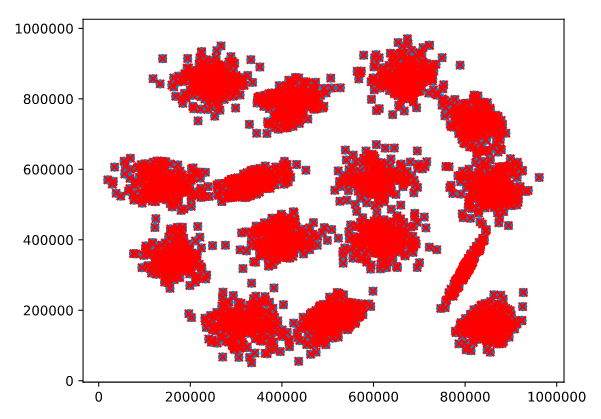

# Congratulations!

1. Congratulations!

Congratulations on successfully completing Fundamentals of BigData via PySpark course. Our goal through this course was to equip you with a basic understanding of Big Data and show how Apache Spark can be used to perform powerful data analysis at scale. Let's quickly review what you have learned so far in this course and recommend you few courses that you can take next.
2. Fundamentals of BigData and Apache Spark

Analyzing BigData is equivalent to conducting both descriptive and inferential analyses using distributed computing techniques such as Spark, with the hopes that the volume, variety, and velocity of BigData that makes distributed computing necessary will lead to deeper or more targeted insights. Chapter 1 started with the fundamentals of BigData and introduced Apache Spark as an open source distributed BigData processing engine, as well as its different components namely Spark Core, Spark SQL, Spark MLlib, Graphx, and Spark Streaming. Because Python is one of the most popular languages for data science, we looked specifically at how you might use PySpark which is Spark’s Python API to execute Spark jobs, and PySpark shell to develop Spark's interactive applications in Python. Finally you learned about the two different modes of running Spark namely local mode and cluster mode.
3. Spark components

Chapter 2 introduced PySpark RDD which is the main API in Spark Core for processing unstructured data. We learned about the different features of RDDs, different methods of creating RDDs and finally, RDD operations namely Transformations and Actions. Chapter 3 explored PySpark SQL which is Spark's high-level API for working with structured data. PySpark SQL creates DataFrames which provides more information about the structure of data and the computation being performed. We looked at the different methods of creating DataFrames, DataFrame operations and finally different methods of visualizing Big Data using DataFrames. Chapter 4 delved deep into PySpark MLlib, Spark's built-in library for machine learning, and discussed how PySpark MLlib makes practical machine learning scalable and easy. This chapter introduced the three C's of MLlib - Collaborative filtering, Classification, and Clustering. The ecosystem of
4. Where to go next?

Apache Spark is vast and ever-expanding, but throughout the course, we’ve discussed the essential underlying concepts. Where you choose to go from here, whether that be experimenting and applying some of these tools and patterns on your own, or investigating Spark components such as Spark SQL or Spark MLlib more deeply, is up to you. But we hope that the concepts, tools, and techniques that we’ve introduced in this course have provided a well-informed starting point, and can continue to serve as a basis for you to refer back to throughout your distributed data analysis journey. With this general understanding of PySpark, we would encourage you to look at other DataCamp PySpark courses focused on feature engineering and recommendation engines to further your knowledge. 